In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
dir_path = '../../Dataset/'
lastfm_filepath='lastfm-dataset-1k.snappy.parquet'

In [13]:
!pwd

/Users/muhammadhamad/Library/CloudStorage/OneDrive-AaltoUniversity/KTH_Courses/Thesis/Code/LLM-Bias-Fairness-Assessment


In [ ]:
df = pd.read_parquet(dir_path+lastfm_filepath)
print(f'Number of Records: {len(df):,}\nUnique Users: {df.user_id.nunique()}\nUnique Artist:{df.artist_id.nunique():,}')
df.head(5)

Number of Records: 19,098,853
Unique Users: 992
Unique Artist:107,295


,user_id,timestamp,artist_id,artist_name,track_id,track_name
0,user_000001,2006-08-13 13:59:20+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,c4633ab1-e715-477f-8685-afa5f2058e42,The Launching Of Big Face
1,user_000001,2006-08-13 14:03:29+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,bc2765af-208c-44c5-b3b0-cf597a646660,Zn Zero
2,user_000001,2006-08-13 14:10:43+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,aa9c5a80-5cbe-42aa-a966-eb3cfa37d832,The Return Of Super Barrio - End Credits
3,user_000001,2006-08-13 14:17:40+00:00,67fb65b5-6589-47f0-9371-8a40eb268dfb,Tommy Guerrero,d9b1c1da-7e47-4f97-a135-77260f2f559d,Mission Flats
4,user_000001,2006-08-13 14:19:06+00:00,1cfbc7d1-299c-46e6-ba4c-1facb84ba435,Artful Dodger,120bb01c-03e4-465f-94a0-dce5e9fac711,What You Gonna Do?


In [22]:
# Load datasets
movies = pd.read_csv(dir_path+'movielens/movie.csv')
ratings = pd.read_csv(dir_path+'movielens/rating.csv')

# Display the first few rows of each dataframe
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40


             userId       movieId        rating
count  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00
std    4.003863e+04  1.978948e+04  1.051989e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    3.439500e+04  9.020000e+02  3.000000e+00
50%    6.914100e+04  2.167000e+03  3.500000e+00
75%    1.036370e+05  4.770000e+03  4.000000e+00
max    1.384930e+05  1.312620e+05  5.000000e+00


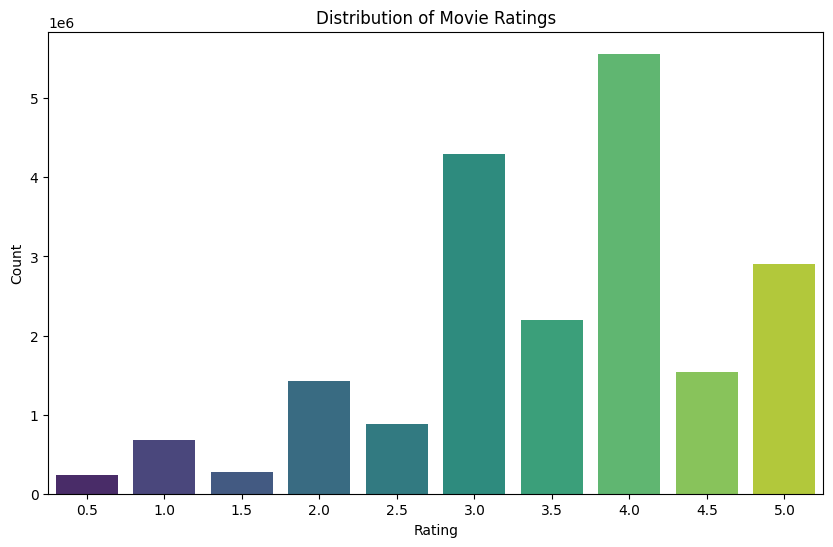

Top 10 most rated movies:
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
Name: title, dtype: int64


In [25]:
# Convert 'timestamp' to datetime format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])

# Merge datasets on 'movieId'
merged_data = pd.merge(ratings, movies, on='movieId')

# Display basic statistics
print(merged_data.describe())

# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=merged_data, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Top 10 most rated movies
top_movies = merged_data['title'].value_counts().head(10)
print("Top 10 most rated movies:")
print(top_movies)